In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int,
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
df_data = pd.read_csv("./data/kc_house_data.csv", dtype=dtype_dict)

In [4]:
df_train = pd.read_csv("./data/kc_house_train_data.csv", dtype=dtype_dict)
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [5]:
df_test = pd.read_csv("./data/kc_house_test_data.csv", dtype=dtype_dict)
df_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0114101516,20140528T000000,310000.0,3.0,1.0,1430.0,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780.0,12697.0
1,9297300055,20150124T000000,650000.0,4.0,3.0,2950.0,5000,2,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140.0,4000.0
2,1202000200,20141103T000000,233000.0,3.0,2.0,1710.0,4697,1.5,0,0,...,6,1710,0,1941,0,98002,47.3048,-122.218,1030.0,4705.0
3,8562750320,20141110T000000,580500.0,3.0,2.5,2320.0,3980,2,0,0,...,8,2320,0,2003,0,98027,47.5391,-122.070,2580.0,3980.0
4,7589200193,20141110T000000,535000.0,3.0,1.0,1090.0,3000,1.5,0,0,...,8,1090,0,1929,0,98117,47.6889,-122.375,1570.0,5080.0


In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()

In [8]:
model.fit(df_train[['sqft_living', 'bedrooms', 'bathrooms']], df_train.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
model.coef_

array([   315.40669062, -65081.88711588,   6942.16598637])

In [10]:
model.intercept_

87912.865814965044

In [11]:
predictions = model.predict(df_train[['sqft_living', 'bedrooms', 'bathrooms']])

In [12]:
print(predictions[0])

271789.26538


## Compute RSS for the model

In [13]:
def get_residual_sum_of_squares(model, data, outcome):
    # First get the predictions
    predictions = model.predict(data)
    # Then compute the residuals/errors
    residuals = (outcome - predictions)
    # Then square and add them up
    RSS = (residuals * residuals).sum()
    return(RSS)    

In [15]:
rss_train = get_residual_sum_of_squares(model, df_test[['sqft_living', 'bedrooms', 'bathrooms']], df_test['price'])
print(rss_train)

2.73761940583e+14


## Creating  some new features

In [16]:
df_train['bedrooms_squared'] = df_train['bedrooms'].apply(lambda x: x**2)
df_test['bedrooms_squared'] = df_test['bedrooms'].apply(lambda x: x**2)

In [17]:
from math import log

In [18]:
df_train['bed_bath_rooms'] = df_train['bedrooms'] * df_train['bathrooms']
df_test['bed_bath_rooms'] = df_test['bedrooms'] * df_test['bathrooms']

In [19]:
df_train['log_sqft_living'] = df_train['sqft_living'].apply(lambda x: log(x))
df_test['log_sqft_living'] = df_test['sqft_living'].apply(lambda x: log(x))

In [20]:
df_train['lat_plus_long'] = df_train['lat'] * df_train['long']
df_test['lat_plus_long'] = df_test['lat'] * df_test['long']

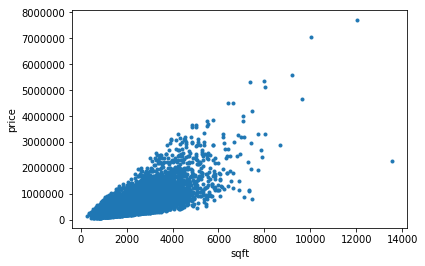

In [23]:
plt.plot(df_train['sqft_living'], df_train['price'], '.')
plt.xlabel('sqft')
plt.ylabel('price')
plt.show()

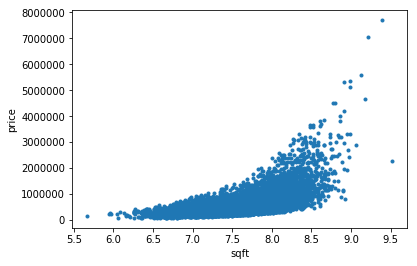

In [25]:
plt.plot(df_train['log_sqft_living'], df_train['price'], '.')
plt.xlabel('sqft')
plt.ylabel('price')
plt.show()

In [41]:
print("{:.2f}".format(df_test['bedrooms_squared'].mean()))

12.45


In [42]:
print("{:.2f}".format(df_test['bed_bath_rooms'].mean()))

7.50


In [43]:
print("{:.2f}".format(df_test['log_sqft_living'].mean()))

7.55


In [44]:
print("{:.2f}".format(df_test['lat_plus_long'].mean()))

-5812.99


## Learning multiple models

In [30]:
model_1_features = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
model_2_features = model_1_features + ['bed_bath_rooms']
model_3_features = model_2_features + ['bedrooms_squared', 'log_sqft_living', 'lat_plus_long']

In [31]:
model_1 = LinearRegression()
model_2 = LinearRegression()
model_3 = LinearRegression()

In [32]:
model_1.fit(df_train[model_1_features], df_train.price)
model_2.fit(df_train[model_2_features], df_train.price)
model_3.fit(df_train[model_3_features], df_train.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
print(model_1.coef_, model_1.intercept_)
print(model_2.coef_, model_2.intercept_)
print(model_3.coef_, model_3.intercept_)

[  3.12258646e+02  -5.95865332e+04   1.57067421e+04   6.58619264e+05
  -3.09374351e+05] -69075726.7926
[  3.06610053e+02  -1.13446368e+05  -7.14613083e+04   6.54844630e+05
  -2.94298969e+05   2.55796520e+04] -66867968.8711
[  5.31964492e+02   3.66338204e+04   6.75006294e+04  -1.39665060e+08
   5.43198511e+07  -9.02007090e+03  -6.96138493e+03  -5.61309405e+05
  -1.14822353e+06] 6610624555.28


### RSS for training data

In [36]:
print(get_residual_sum_of_squares(model_1, df_train[model_1_features], df_train.price))
print(get_residual_sum_of_squares(model_2, df_train[model_2_features], df_train.price))
print(get_residual_sum_of_squares(model_3, df_train[model_3_features], df_train.price))

9.6787996305e+14
9.58419635074e+14
8.9592707379e+14


### RSS for test data

In [37]:
print(get_residual_sum_of_squares(model_1, df_test[model_1_features], df_test.price))
print(get_residual_sum_of_squares(model_2, df_test[model_2_features], df_test.price))
print(get_residual_sum_of_squares(model_3, df_test[model_3_features], df_test.price))

2.25500469795e+14
2.23377462976e+14
2.58804831454e+14
